# U.S. GDP, Consumption, and Investment

## Brian Dew, brianwdew@gmail.com

## Python Example
This example shows how Python can be used to gather and plot data on the Fed's broad index of the foreign exchange value of the dollar. The script gathers data from [Fred](https://research.stlouisfed.org/fred2/series/DTWEXM) and plots movements since 2014.

## Gathering data
First, we import pandas, numpy, and matplotlib and give them conventional short names. We will also use datetime and date.

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import date

Next, we use the pandas.io.data package to request the data from Fred. I've found the code for our series of interest, DTWEXM, by searching, but you can also find it on the Fred site by source (Board of Governors of the Federal Reserve System), or by release (H.10). We paste the series code into the datareader and provide start and end dates. Pandas retrieves the data into a dataframe.

In [28]:
import pandas_datareader.data as webdata
tstart = datetime.datetime(1973, 1, 1)
tend = datetime.datetime(2016, 4, 1)
frednames = "GDPC1", "GPDIC1", "B230RC0Q173SBEA", "NNBGFNQ027S", "GCEC1", "PCNDGC96", "DSERRA3Q086SBEA"
#retrieve trade-weighted dollar data from fred
gdpcomp = webdata.DataReader(frednames, "fred", tstart, tend);
#calculate output as GDP - Government Spending
gdpcomp['outcap'] = ((gdpcomp['GDPC1'] - gdpcomp['GCEC1']) * 1000000) / gdpcomp['B230RC0Q173SBEA']
#calculate consumption as nondurables + services
gdpcomp['conscap'] = ((gdpcomp['PCNDGC96'] + gdpcomp['DSERRA3Q086SBEA']) * 1000000) / gdpcomp['B230RC0Q173SBEA']
#calculate gross private investment per capita
gdpcomp['invcap'] = (gdpcomp['GPDIC1'] * 1000000) / gdpcomp['B230RC0Q173SBEA']
#take log of three key variables
gdpcomp['loggdp'] = np.log(gdpcomp['outcap'])
gdpcomp['logpce'] = np.log(gdpcomp['conscap'])
gdpcomp['loginv'] = np.log(gdpcomp['invcap'])
#display five most recent observations
gdpcomp[['loggdp','logpce','loginv']].tail(5)

,loggdp,logpce,loginv
DATE,,,
2014-10-01,10.635192,8.963827,9.066245
2015-01-01,10.635460,8.963973,9.085130
2015-04-01,10.643982,8.972496,9.095519
2015-07-01,10.646878,8.980393,9.091629
2015-10-01,10.648879,8.979999,9.087075


## Line plots of data
Lastly, we can use matplotlib to plot the data. The past week has seen this measure of oil prices reach nearly $40 per barrel. 

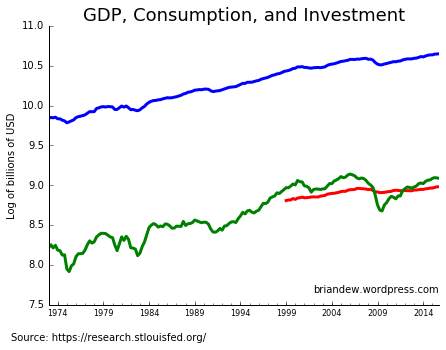

In [29]:
#Create figure and plot dtwexm
fig = plt.figure(figsize=[7,5])
ax1 = plt.subplot(111)
linegdp = gdpcomp.loggdp.plot(color='blue',linewidth=3)
linepce = gdpcomp.logpce.plot(color='red',linewidth=3)
lineinv = gdpcomp.loginv.plot(color='green',linewidth=3)

#Add a title
ax1.set_title('GDP, Consumption, and Investment', fontsize=18)

#Add y label and no x-label since it is dates
ax1.set_ylabel('Log of billions of USD')
ax1.set_xlabel('')

#Axis options
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x', which='major', labelsize=8)

#Annotate with text
url = 'https://research.stlouisfed.org/'
fig.text(0.05, 0.025, 'Source: ' + url)
fig.text(0.65, 0.16, 'briandew.wordpress.com')

#Save as png
plt.savefig('gdpcomp.png', dpi=1000)